In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

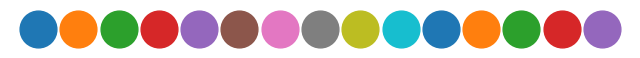

In [2]:
# https://brand.utexas.edu/identity/color/
import random
from cycler import cycler

random.Random(12).shuffle(colors := '#bf5700 #f8971f #ffd600 #a6cd57 #579d42 #00a9b7 #005f86 #9cadb7 #333f48'.split(' '))
plt.figure(figsize=(8,0.5))
for i in range(15): plt.scatter(i,0,s=700)
plt.axis('off')
plt.show()
plt.rc('axes', prop_cycle=cycler(color=colors))

In [3]:
def plot_util(title:str, xlabel:str, ylabel:str, outer_legend:bool, xlim0:bool, ylim0:bool):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if outer_legend: plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=2)
    else: plt.legend()
    plt.grid()
    if xlim0: plt.xlim(left=0)
    if ylim0: plt.ylim(bottom=0)

def my_save_fig(filename):
    IMAGE_DIRECTORY = r'./'
    plt.savefig(IMAGE_DIRECTORY+filename, bbox_inches='tight')

In [17]:
import pickle
vgg11hist = open('../../VGG11/VGG11_history.p','rb')
dat11 = pickle.load(vgg11hist)
vgg11hist.close()
vgg16hist = open('../../VGG16/VGG16_history.p','rb')
dat16 = pickle.load(vgg16hist)
vgg16hist.close()
dat11['epoch'] = np.arange(1, len(dat11['loss'])+1)
print(dat11.keys())
print(dat16.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'epoch'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'epoch'])
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


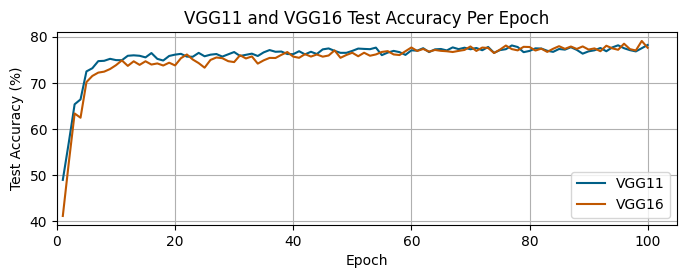

In [22]:
# P1 Q3

plt.figure(figsize=(8,2.5))
print(dat11.keys())
print(dat16.keys())

x = dat11['epoch']
y1 = np.array(dat11['val_accuracy'])*100
y2 = np.array(dat16['val_accuracy'])*100

plt.plot(x, y1, label='VGG11')
plt.plot(x, y2, label='VGG16')
plot_util('VGG11 and VGG16 Test Accuracy Per Epoch', 
          'Epoch', 'Test Accuracy (%)',
          False, True, False)
my_save_fig('vgg11_16_acc.pdf')

plt.show()

In [19]:
# P2 Q3

mc1_path = r'../../mc1_results/'
rpi_path = r'../../rpi_results/'
models = ['VGG11', 'VGG16', 'MobileNet']
df_mc1 = {m:pd.read_csv(mc1_path+m+'_power_temperature.csv') for m in models}
df_rpi = {m:pd.read_csv(rpi_path+m+'_power_temperature.csv') for m in models}

display(df_mc1['VGG11'].head())
display(df_rpi['VGG11'].head())

,Time stamp,Power,avg_temp
0,1.678298e+09,0.000,41.25
1,1.678298e+09,0.000,40.00
2,1.678298e+09,0.000,39.75
3,1.678298e+09,5.202,40.00
4,1.678298e+09,5.202,43.25


,Time stamp,Power,avg_temp
0,1.678298e+09,0.0,38.628
1,1.678298e+09,0.0,38.628
2,1.678298e+09,0.0,39.704
3,1.678298e+09,0.0,39.166
4,1.678298e+09,0.0,39.704


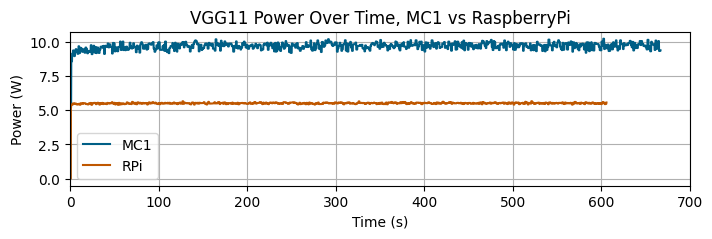

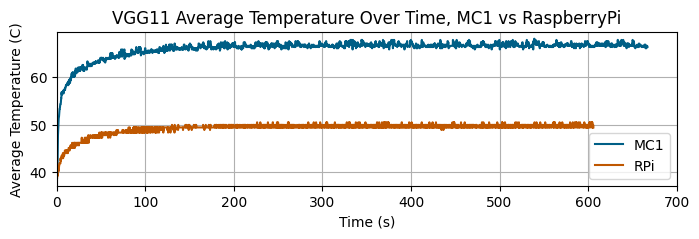

In [20]:
# P2 Q3

def plot_p2q3(col, col_title, units, model='VGG11'):
    plt.figure(figsize=(8,2))

    t_col = lambda df: (x:=df[model]['Time stamp'].to_numpy())-x[0]
    x_mc1 = t_col(df_mc1)
    x_rpi = t_col(df_rpi)
    y_mc1 = df_mc1[model][col].to_numpy()
    y_rpi = df_rpi[model][col].to_numpy()

    plt.plot(x_mc1, y_mc1, label='MC1')
    plt.plot(x_rpi, y_rpi, label='RPi')

    plot_util(f'VGG11 {col_title} Over Time, MC1 vs RaspberryPi',
            'Time (s)', f'{col_title} ({units})',
            False, True, False)
    my_save_fig(f'{model} {col_title}.pdf'.lower().replace(' ', '_'))

    plt.show()

plot_p2q3('Power', 'Power', 'W')
plot_p2q3('avg_temp', 'Average Temperature', 'C')